In [60]:
%reload_ext autoreload
%autoreload 2

from src.nuclei.nucleus import LongNucleus

n = LongNucleus(2, 3)
n.nucleus.shape

(3, 4, 4)

In [61]:
n.project([0, 0])

[0, 0, 0]

In [3]:
from sklearn.decomposition import PCA

X = train.iloc[:, 1:].values
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [4]:
pca_x = pca.transform(X)

In [5]:
stimuli = {
    'x': pca_x,
    'y': train.label.apply(lambda x: 0 if x < 5 else 2)
}
stimuli['y']

0        0
1        0
2        0
3        0
4        0
        ..
41995    0
41996    0
41997    2
41998    2
41999    2
Name: label, Length: 42000, dtype: int64

In [6]:
input_size = stimuli['x'].shape[1]
input_size

10

In [9]:
from src.nuclei.nucleus import BaseNucleus
from src.nuclei.anneal import Anneal


nucleus = BaseNucleus(input_size)
anneal = Anneal(nucleus, temp=input_size, steps=50, epochs=10)

Epoch: 1


training in epoch 1: 100%|██████████| 50/50 [01:30<00:00,  1.82s/it]


Epoch training loss: 40791.32
Epoch: 2


training in epoch 2: 100%|██████████| 50/50 [01:30<00:00,  1.81s/it]


Epoch training loss: 40691.7
Epoch: 3


training in epoch 3: 100%|██████████| 50/50 [01:27<00:00,  1.74s/it]


Epoch training loss: 40612.306666666664
Epoch: 4


training in epoch 4: 100%|██████████| 50/50 [01:26<00:00,  1.73s/it]


Epoch training loss: 40543.29
Epoch: 5


training in epoch 5: 100%|██████████| 50/50 [01:28<00:00,  1.76s/it]


Epoch training loss: 40475.408
Epoch: 6


training in epoch 6: 100%|██████████| 50/50 [01:44<00:00,  2.09s/it]


Epoch training loss: 40421.22666666667
Epoch: 7


training in epoch 7:  72%|███████▏  | 36/50 [01:05<00:25,  1.79s/it]/Users/uandrl9/Git/nuclei/src/nuclei/anneal.py:68: RuntimeWarning: overflow encountered in exp
  prob = np.exp((e_j - e_i) / temp)
training in epoch 7: 100%|██████████| 50/50 [01:31<00:00,  1.82s/it]


Epoch training loss: 40377.05142857143
Epoch: 8


training in epoch 8: 100%|██████████| 50/50 [01:30<00:00,  1.81s/it]


Epoch training loss: 40339.32
Epoch: 9


training in epoch 9: 100%|██████████| 50/50 [01:30<00:00,  1.81s/it]


Epoch training loss: 40308.595555555556
Epoch: 10


training in epoch 10: 100%|██████████| 50/50 [01:30<00:00,  1.81s/it]


Epoch training loss: 40282.936


<Axes: >

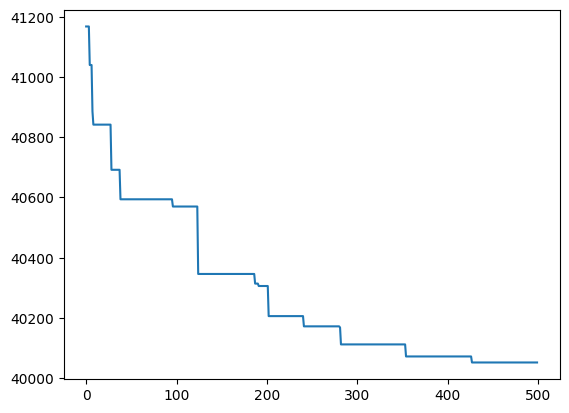

In [10]:
best, loss = anneal.stimulate(stimuli)
pd.Series(loss).plot()

In [14]:
best.project(pca_x[40000].tolist())

2